In [1]:
%matplotlib inline
import matplotlib.pylab

%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

import numpy as np
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


# The special thing about time series is that data points relate to one another...they are not independent
So we can to compare them and relate them. One way to do this is to look at how they change. For example, we can 'difference' a time series

In [2]:
ts = pd.Series(np.random.randn(20), pd.date_range('7/1/16', freq = 'D', periods = 20))
ts_lagged = ts.shift()

In [14]:
ts.head()

2016-07-01   -1.253500
2016-07-02    0.635517
2016-07-03    0.370653
2016-07-04    1.164478
2016-07-05    1.056878
Freq: D, dtype: float64

In [16]:
ts_lagged.head()

2016-07-01         NaN
2016-07-02   -1.253500
2016-07-03    0.635517
2016-07-04    0.370653
2016-07-05    1.164478
Freq: D, dtype: float64

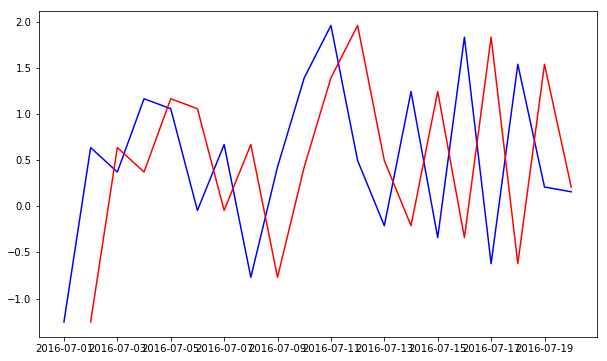

In [3]:
plt.plot(ts, color = 'blue')
plt.plot(ts_lagged, color = 'red')

### Query: how can I shift my time series 'into the future' instead of into the past?

In [4]:
# %load snippets/shift_future.py


# Window functions give you moving aggregate measures of a time series

In [5]:
# Window functions are like aggregation functions
# You can use them in conjunction with .resample()

In [6]:
df = pd.DataFrame(np.random.randn(600, 3), index = pd.date_range('5/1/2016', freq = 'D', periods = 600), columns = ['A', 'B', 'C'])

In [17]:
df.head()

,A,B,C
2016-05-01,1.285862,-0.336814,-0.248546
2016-05-02,-0.335618,-0.066624,-0.070528
2016-05-03,0.493164,1.187730,-1.920382
2016-05-04,1.520805,0.212457,0.004205
2016-05-05,-1.439048,0.781203,0.838997


In [7]:
r = df.rolling(window = 20)
r

Rolling [window=20,center=False,axis=0]

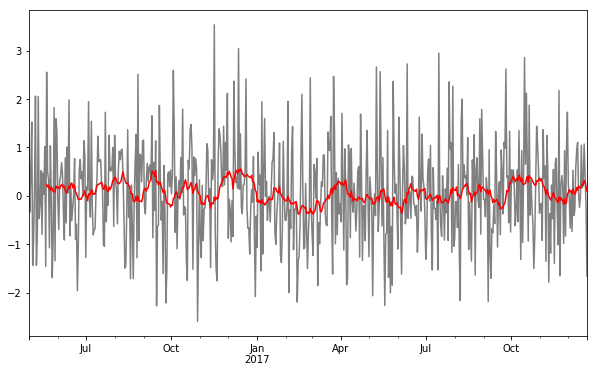

In [8]:
df['A'].plot(color = 'gray')
r.mean()['A'].plot(color = 'red')

### Try out some of these options with .rolling()

r.agg, r.apply, r.count, r.max, r.median, r.name, r.quantile, r.kurt, 
r.aggregate, r.std, r.skew, r.sum, r.var

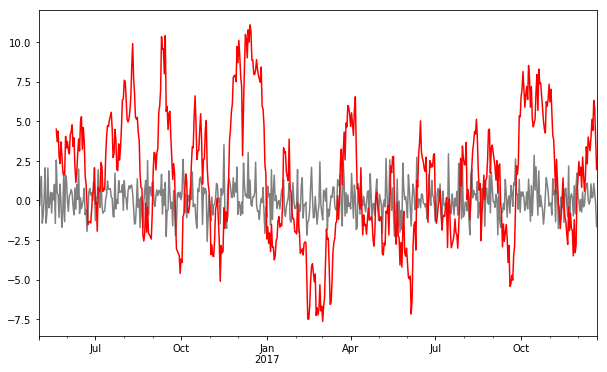

In [26]:
df['A'].plot(color = 'gray')
r.sum()['A'].plot(color = 'red')

### What about a custom function?

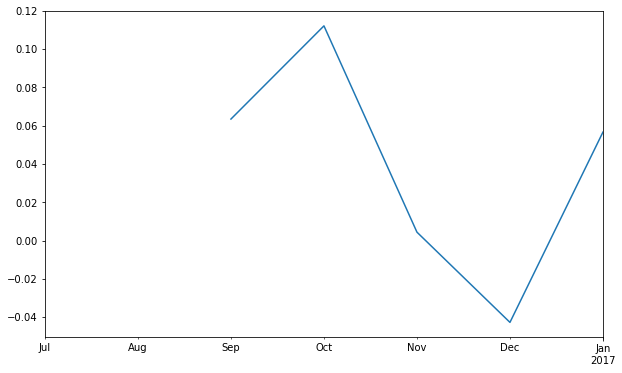

In [30]:
# %load snippets/custom_rolling.py
ts_long = pd.Series(np.random.randn(200), pd.date_range('1/1/16', freq = 'D', periods = 200))
ts_long.resample('M').mean().rolling(window=3).mean().plot()

### What if I want to generate a rolling window function of monthly data from daily data?

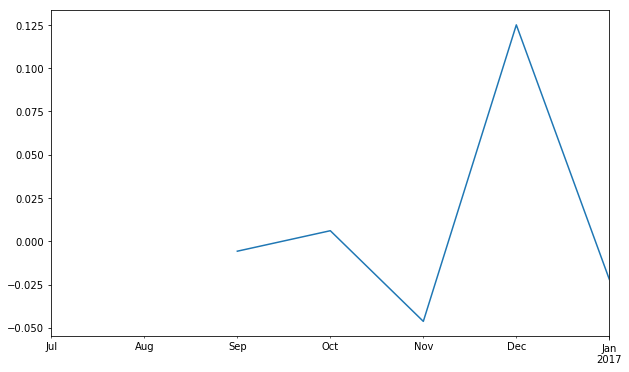

In [31]:
# %load snippets/resample_rolling.py
ts_long = pd.Series(np.random.randn(200), pd.date_range('7/1/16', freq = 'D', periods = 200))
ts_long.resample('M').mean().rolling(window=3).mean().plot()

## Expanding windows

In [11]:
df.expanding(min_periods = 1).mean()[1:5]

,A,B,C
2016-05-02,0.475122,-0.201719,-0.159537
2016-05-03,0.481136,0.261431,-0.746485
2016-05-04,0.741053,0.249187,-0.558812
2016-05-05,0.305033,0.355590,-0.279251


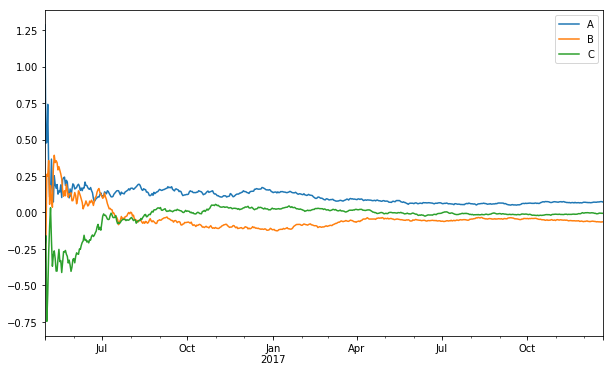

In [12]:
df.expanding(min_periods = 1).mean().plot()

# Try

(1) How can you perform an exponentially weight moving average rather than a window function? (hint: look for ewma + pandas docs)

(2) When would you use an expanding window vs. a rolling window?

(3) Write a custom function to repace .quantile(.5) function for a moving average

(4) How would you compute more than one aggregation function on a moving window function at the same time? 

In [13]:
# %load snippets/window_funcs_try.py

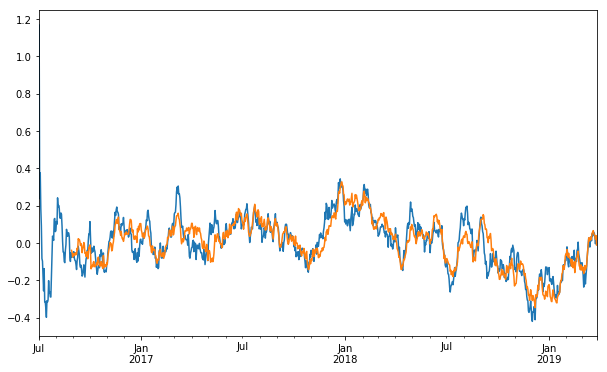

In [33]:
ts = pd.Series(np.random.randn(1000), pd.date_range('7/1/16', freq = 'D', periods = 1000))
ts.ewm(span=60, freq= 'D', min_periods=0, adjust=True).mean().plot()
ts.rolling(window=60).mean().plot()

In [34]:
# would use an expanding window when adding new data to a profile while keeping old data

In [35]:
ts.rolling(window=60).apply(lambda x: sorted(x)[round(len(x)*.5)])

2016-07-01         NaN
2016-07-02         NaN
2016-07-03         NaN
2016-07-04         NaN
2016-07-05         NaN
2016-07-06         NaN
2016-07-07         NaN
2016-07-08         NaN
2016-07-09         NaN
2016-07-10         NaN
2016-07-11         NaN
2016-07-12         NaN
2016-07-13         NaN
2016-07-14         NaN
2016-07-15         NaN
2016-07-16         NaN
2016-07-17         NaN
2016-07-18         NaN
2016-07-19         NaN
2016-07-20         NaN
2016-07-21         NaN
2016-07-22         NaN
2016-07-23         NaN
2016-07-24         NaN
2016-07-25         NaN
2016-07-26         NaN
2016-07-27         NaN
2016-07-28         NaN
2016-07-29         NaN
2016-07-30         NaN
                ...   
2019-02-26   -0.087046
2019-02-27   -0.049571
2019-02-28   -0.087046
2019-03-01   -0.049571
2019-03-02   -0.087046
2019-03-03   -0.087046
2019-03-04   -0.087046
2019-03-05   -0.087046
2019-03-06   -0.049571
2019-03-07   -0.049571
2019-03-08   -0.049571
2019-03-09   -0.049571
2019-03-10 

In [36]:
ts.rolling(window=60).agg(['sum', 'count']).head()

,sum,count
2016-07-01,NaN,1.0
2016-07-02,NaN,2.0
2016-07-03,NaN,3.0
2016-07-04,NaN,4.0
2016-07-05,NaN,5.0
